<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#7.1-전체-구조" data-toc-modified-id="7.1-전체-구조-1">7.1 전체 구조</a></span></li><li><span><a href="#7.2-합성곱-계층" data-toc-modified-id="7.2-합성곱-계층-2">7.2 합성곱 계층</a></span><ul class="toc-item"><li><span><a href="#7.2.1-완전연결-계층의-문제점" data-toc-modified-id="7.2.1-완전연결-계층의-문제점-2.1">7.2.1 완전연결 계층의 문제점</a></span></li><li><span><a href="#7.2.2-합성곱-연산" data-toc-modified-id="7.2.2-합성곱-연산-2.2">7.2.2 합성곱 연산</a></span></li><li><span><a href="#7.2.3-패딩" data-toc-modified-id="7.2.3-패딩-2.3">7.2.3 패딩</a></span></li></ul></li></ul></div>

이번 장의 주제는 **합성곱 신경망(Convolutional Neural Network, CNN)**이다. CNN은 이미지 인식과 음성 인식 등 다양한 곳에서 사용되는데, 특히 이미지 인식 분야에서 딥러닝을 활용한 기법은 거의 다 CNN을 기초로 한다.

# 7.1 전체 구조
CNN도 지금까지 본 신경망과 같이 레고 블록처럼 계층을 조합하여 만들 수 있다. 다만, **합성곱 계층**과 **풀링 계층**이 새롭게 등장한다. 이번 절에서는 이 계층들을 어떻게 조합하여 CNN을 만드는지 살펴본다.<br><br>
지금까지 본 신경망은 인접하는 계층의 모든 뉴런과 결합되어 있었다. 이를 **완전연결**이라고 하며, 완전히 연결된 계층을 **Affine 계층**이라는 이름으로 구현하였다. 이 Affine 계층을 사용하면, 가령 층이 5개인 완전연결 신경망은 다음과 같이 구현할 수 있다. <br><br>

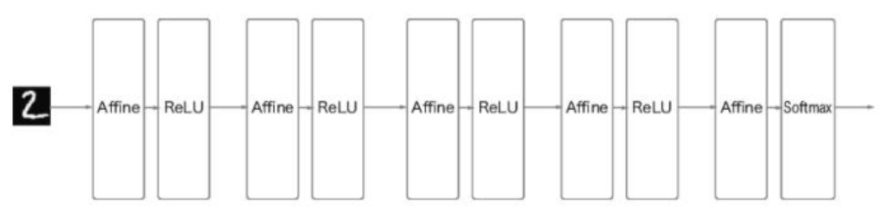

그림과 같이 완전연결 신경망은 Affine 계층 뒤에 활성화 함수를 갖는 ReLU 계층 (혹은 Sigmoid 계층)이 이어진다. 이 그림에서는 Affine-ReLU 조합이 4개가 쌓였고, 마지막 5번째 층은 Affine 계층에 이어 소프트맥스 계층에서 최종 결과(확률)를 출력한다.<br><br>
그럼 CNN의 구조는 어떻게 다를까?

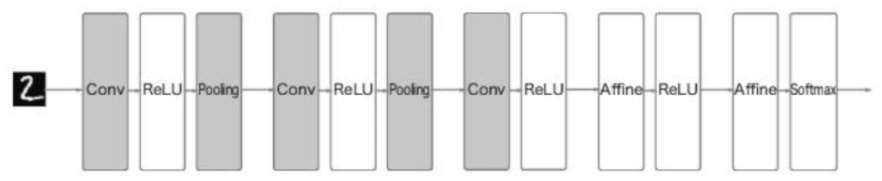

그림과 같이 CNN에서는 새로운 '합성곱 계층(Conv)'과 '풀링 계층(Pooling)'이 추가된다. CNN의 계층은 'Conv-ReLU-(Pooling)' 흐름으로 연결된다. (풀링 계층은 생략하기도 한다.)<br><br>
CNN에서 주목할 또 다른 점은 출력에 가까운 층에서는 지금까지의 'Affine-ReLU' 구성을 사용할 수 있다는 것이다. 또, 마지막 출력 계층에서는 'Affine-Softmax' 조합을 그대로 사용한다. 이상은 일반적인 CNN에서 흔히 볼 수 있는 구성이다.

# 7.2 합성곱 계층
CNN에서는 **패딩, 스트라이드** 등 CNN 고유의 용어가 등장한다. 또, 각 계층 사이에는 3차원 데이터같이 입체적인 데이터가 흐른다는 점에서 완전연결 신경망과 다르다.

## 7.2.1 완전연결 계층의 문제점
지금까지 본 완전연결 신경망에서는 완전연결 계층(Affine 계층)을 사용하였다. 완전연결 계층에서는 인접하는 계층의 뉴런이 모두 연결되고 출력의 수는 임의로 정할 수 있다.<br><br>
완전연결 계층의 문제점은 무엇일까? 바로 '데이터의 형상이 무시'된다는 사실이다. 입력 데이터가 이미지인 경우를 예로 들면, 이미지는 통상 세로, 가로, 채널(색상)로 구성된 3차원 데이터이다. 그러나 완전연결 계층에 입력할 때는 3차원 데이터를 평평한 1차원 데이터로 평탄화해줘야 한다. <br><br>
이미지는 3차원 형상이며, 이 형상에는 공간적 정보가 담겨 있다. 예를 들어 공간적으로 가까운 픽셀은 값이 비슷하거나, RGB의 각 채널은 서로 밀접하게 관련되어 있거나, 거리가 먼 픽셀끼리는 별 연관이 없는 등, 3차원 속에서 의미를 갖는 본질적인 패턴이 숨어 있을 것이다. 그러나 완전연결 계층은 형상을 무시하고 모든 입력 데이터를 동등한 뉴런(같은 차원의 뉴런)으로 취급하여 형상에 담긴 정보를 살릴 수 없다.<br><br>
한편, 합성곱 계층은 형상을 유지한다. 이미지도 3차원 데이터로 입력받으며, 마찬가지로 다음 계층에도 3차원 데이터로 전달한다. 그래서 CNN에서는 이미지처럼 형상을 가진 데이터를 제대로 이해할 가능성이 있는 것이다.<br><br>
CNN에서는 합성곱 계층의 입출력 데이터를 **'특징 맵'** 이라고도 한다. 합성곱 계층의 입력 데이터를 **입력 특징 맵**, 출력 데이터를 **출력 특징 맵**이라고 하는 식이다. 

## 7.2.2 합성곱 연산
합성곱 계층에서의 **합성곱 연산**을 처리한다. 합성곱 연산은 이미지 처리에서 말하는 **필터 연산**에 해당한다.<br><br>
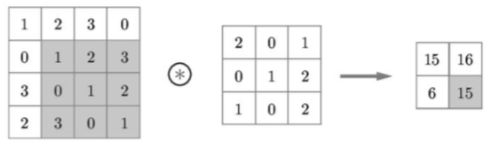<br><br>
그림과 같이 합성곱 연산은 입력 데이터에 필터를 적용한다. 이 예에서 입력 데이터는 세로, 가로 방향의 형상을 가졌고, 필터 역시 세로, 가로 방향의 차원을 갖는다. 데이터와 필터의 형상을 (높이, 너비)로 표기하며, 이 예에서는 입력은 (4, 4), 필터는 (3, 3), 출력은 (2, 2)가 된다. 문헌에 따라 필터를 **커널**이라 칭하기도 한다. 

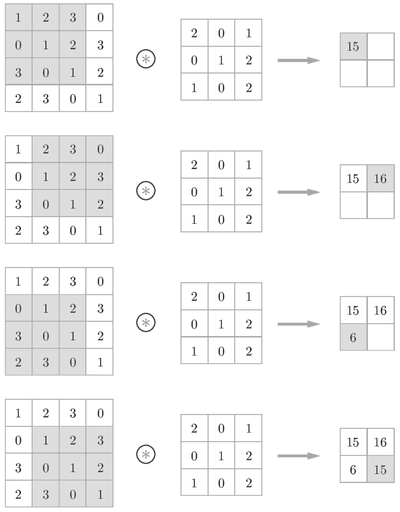

합성곱 연산은 필터의 **윈도우**를 일정 간격으로 이동해가며 입력 데이터에 적용한다. 여기에서 말하는 윈도우는 그림의 회색 3 X 3 부분을 가리킨다. 이 그림에서 보듯 입력과 필터에서 대응하는 원소끼리 곱한 후 그 총합을 구한다. (이 계산을 **단일 곱셈-누산**이라 한다.) 그리고 그 결과를 출력의 해당 장소에 저장한다. 이 과정을 모든 장소에서 수행하면 합성곱 연산의 출력이 완성된다. 

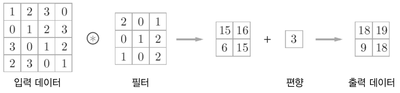

## 7.2.3 패딩
합성곱 연산을 수행하기 전에 입력 데이터 주변을 특정 값(예컨대 0)으로 채우기도 한다. 이를 **패딩**이라 하며, 합성곱 연산에서 자주 이용하는 기법이다.

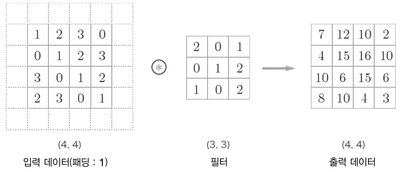

예를 들어 위의 그림은 (4, 4)크기의 입력 데이터에 폭이 1인 패딩을 적용한 모습이다. 폭 1짜리 패딩이라 하면 입력 데이터 사방 1픽셀을 특정 값으로 채우는 것이다.<br><br>
그림과 같이 처음에 크기가 (4, 4)인 입력 데이터에 패딩이 추가되어 (6, 6)이 된다. 이 입력에 (3, 3) 크기의 필터를 걸면 (4, 4) 크기의 출력 데이터가 생성된다. 이 예에서는 패딩을 1로 설정했지만, 2나 3 등 원하는 정수로 설정할 수 있다. 만약 패딩을 2로 설정하면 입력 데이터의 크기는(8, 8)이 되고, 3으로 설정하면 (10, 10)이 된다.

> 패딩은 주로 출력 크기를 조정할 목적으로 사용한다. 예를 들어 (4, 4) 입력 데이터에 (3, 3) 필터를 적용하면 출력은 (2, 2)가 되어, 입력보다 2만큼 줄어든다. 이는 합성곱 연산을 몇 번이나 되풀이하는 심층 신경망에서는 문제가 될 수 있습니다. 합성곱 연산을 거칠 때마다 크기가 작아지면 어느 시점에서는 출력 크기가 1이 되어버린다. 이러한 사태를 막기 위해 패딩을 사용한다. 앞에 예에서는 패딩의 폭을 1로 설정하니 (4, 4) 입력에 대한 출력이 같은 크기인 (4, 4)로 유지되었다. 한 마디로 입력 데이터의 공간적 크기를 고정한 채로 다음 계층에 전달할 수 있다.